In [157]:
# pip install xlrd

In [158]:
# pip install statsmodels

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ml_metrics as metrics
from statsmodels.tsa.arima_model import ARIMA as arima
from scipy import stats

In [160]:
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 4)

In [161]:
df = pd.read_excel('AI_les06_dataset.xlsx', index_col='Дата', parse_dates=True, dayfirst=True)

In [162]:
# df = df.rename(index=str, columns={'Значение':'val'})

In [163]:
# df.index.names = ['date']

In [164]:
df = df.resample('w', how='mean')

In [165]:
df.shape

(210, 1)

In [166]:
# test = df[170:]

In [167]:
df, test = df[:170], df[170:]

In [168]:
df.shape, test.shape

((170, 1), (40, 1))

In [141]:
# df = df.Значение

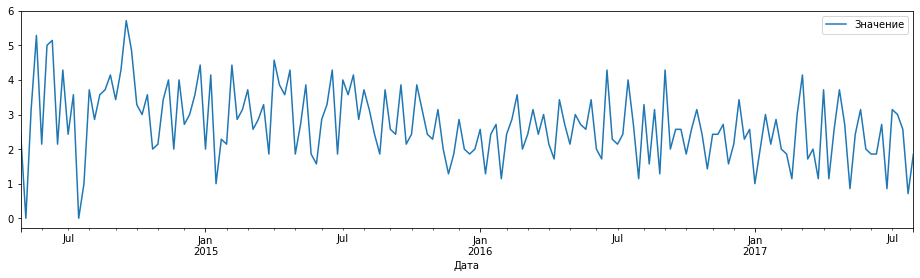

In [170]:
df.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd044a4fba8>]],
      dtype=object)

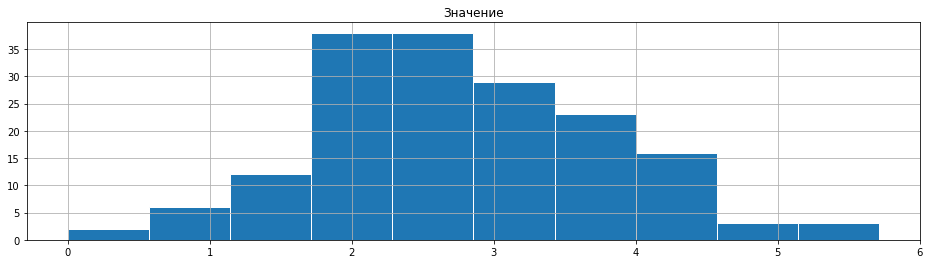

In [171]:
df.hist(edgecolor='w', bins=10)

In [174]:
# desc = df.describe()

In [177]:
# desc['std'] / desc['mean']

In [178]:
jb_test = stats.jarque_bera(df)

In [179]:
jb_test

(0.9380714188470632, 0.6256052427548545)

In [180]:
model = arima(df, order=(1,1,1), freq='w').fit(disp=0)

In [181]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Значение   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.182
Method:                       css-mle   S.D. of innovations              0.958
Date:                Sun, 02 Jun 2019   AIC                            478.364
Time:                        13:34:40   BIC                            490.884
Sample:                    05-11-2014   HQIC                           483.445
                         - 07-30-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0072      0.001     -4.955      0.000      -0.010      -0.004
ar.L1.D.Значение    -0.0379      0.077     -0.492      0.624      -0.189       0.113
ma.L1.D.Значение    -1.0000 

In [193]:
df

,Значение
Дата,
2014-05-04,2.500000
2014-05-11,0.000000
2014-05-18,3.142857
2014-05-25,5.285714
2014-06-01,2.142857
2014-06-08,5.000000
2014-06-15,5.142857
2014-06-22,2.142857
2014-06-29,4.285714


In [222]:
pred = model.predict('2014-07-06', '2018-04-29', typ='levels')

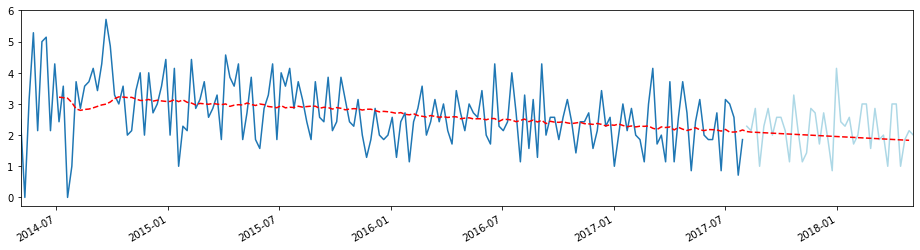

In [218]:
plt.plot(df)
plt.plot(test, c='lightblue')

pred.plot(c='r', style='--')

In [186]:
# pred.plot(c='r')
# df.plot()
# test.plot()
# plt.show()